Importing the data and checking the version of tensorflow installed

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import cv2
import numpy as np
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.9.2


Defining the constants that will be used throughout the training and testing process

In [34]:
IMG_SIZE = 500
EPICOPS_NUMBER = 40

Creating the default classifications of the data, which will be what the neural network will try to classify the given data to.

In [3]:
class_names = ["DefectLeaf", "HealthLeaf","DefectPlant","HealthPlant"]

Getting the locations of the images and stored into a variables that could be reused

In [4]:
DATADIR_TEST = "Images/Testing_Dataset"
DATADIR = "Images/Trainning_Dataset"

the training and the testing data are located locally on the machine and will need to be loaded into the an array, this in done by getting the caategory from the name of the subfolder in the directory of the image folder and classifying the data into the redefined categories.

In [5]:
training_data = []
def create_training_data():
    for category in class_names:
        path = os.path.join(DATADIR,category)
        class_num = class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)
                pass

In [6]:
testing_data = []
def create_testing_data():
    for category in class_names:
        path = os.path.join(DATADIR_TEST,category)
        class_num = class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                print(e)
                pass

In [7]:
# Now that the functions are defined the need to be called,

In [8]:
create_training_data()
create_testing_data()

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [9]:
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

At this point all the data has been loaded, but nowit has to be devided into lables and the actual data, that is the image data and the labels.
this is done for both the testing and the training data. Then the images have to be resized to a smaller size to be able to be used by the neural network.

In [10]:
for features,label in training_data:
    train_images.append(features)
    train_labels.append(label)
    
train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
for features,label in testing_data:
    test_images.append(features)
    test_labels.append(label)
    
test_images = np.array(test_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Just to check if the resizing worked, the images are printed out to see if they are the correct size.

In [12]:
train_images.shape


(172, 500, 500, 1)

This is just to check if the lables of the data are correct, the data is not used in the training process.

In [13]:
train_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

We print out the number if images in the training and testing data to see if they are correct.and loaded into the array.

In [14]:
len(train_labels)

172

We then show the image of the first image in the training data and the first image in the testing data.

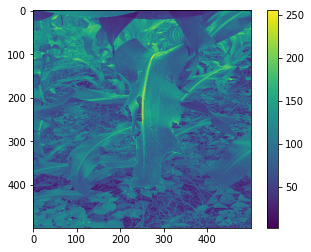

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

all images are then resized to a smaller size to be able to be used by the neural network.

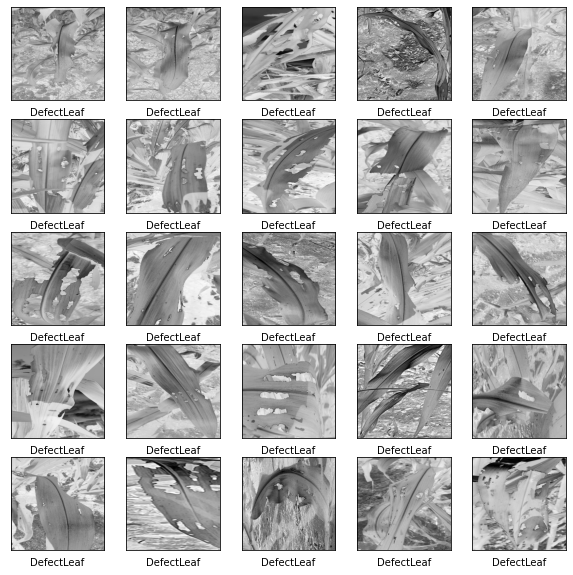

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

we then prepare the layers for the model .

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-18 09:00:30.995237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 09:00:30.995676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Here we convert the current list array into a numpy array. because the parameters of the testing section can not take in list but numpy arrays.

In [18]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels= np.array(train_labels)
test_labels = np.array(test_labels)

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model training

In [35]:
model.fit(train_images, train_labels, epochs=EPICOPS_NUMBER)

Epoch 1/40
6/6 [==============================] - 1s 112ms/step - loss: 74.6058 - accuracy: 0.9419
Epoch 2/40
6/6 [==============================] - 1s 101ms/step - loss: 200.0834 - accuracy: 0.9360
Epoch 3/40
6/6 [==============================] - 1s 100ms/step - loss: 709.4387 - accuracy: 0.7151
Epoch 4/40
6/6 [==============================] - 1s 102ms/step - loss: 278.4384 - accuracy: 0.8547
Epoch 5/40
6/6 [==============================] - 1s 101ms/step - loss: 522.8986 - accuracy: 0.7209
Epoch 6/40
6/6 [==============================] - 1s 105ms/step - loss: 119.2846 - accuracy: 0.9128
Epoch 7/40
6/6 [==============================] - 1s 100ms/step - loss: 130.8239 - accuracy: 0.9186
Epoch 8/40
6/6 [==============================] - 1s 100ms/step - loss: 84.6503 - accuracy: 0.9360
Epoch 9/40
6/6 [==============================] - 1s 98ms/step - loss: 126.3900 - accuracy: 0.9419
Epoch 10/40
6/6 [==============================] - 1s 101ms/step - loss: 389.1057 - accuracy: 0.8663
Ep

Testing the accuracy of the model

In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 3831.6255 - accuracy: 0.3929 - 241ms/epoch - 120ms/step

Test accuracy: 0.392857164144516


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

2/2 [==============================] - 0s 85ms/step


2022-08-18 09:00:50.632666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
np.argmax(predictions[0])

3

In [38]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

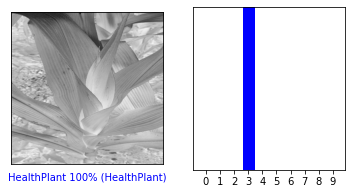

In [27]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

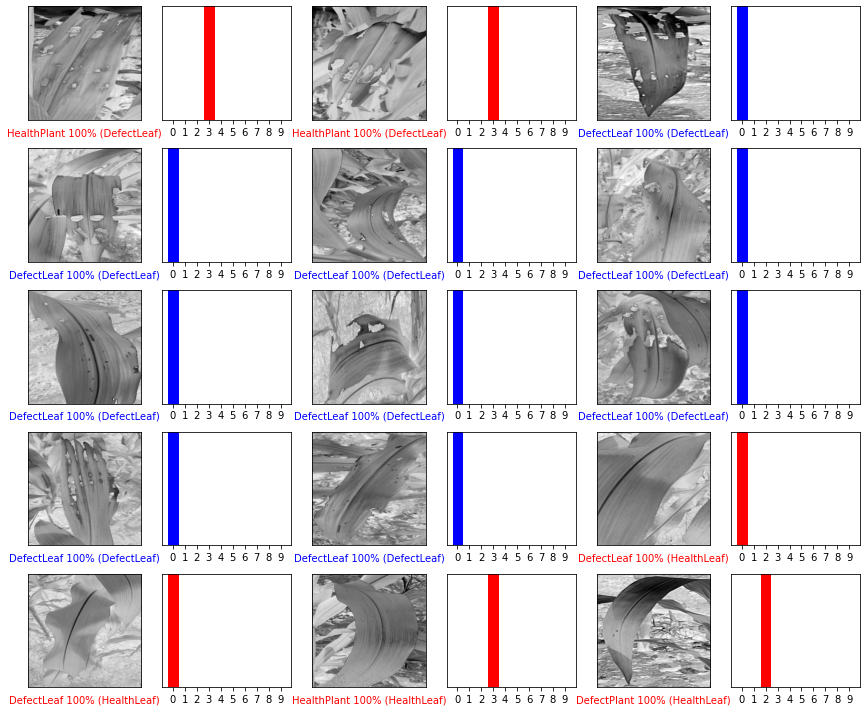

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

img = test_images[1]

print(img.shape)

In [29]:
img = test_images[1]

print(img.shape)
img = (np.expand_dims(img,0))

print(img.shape)

(500, 500, 1)
(1, 500, 500, 1)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


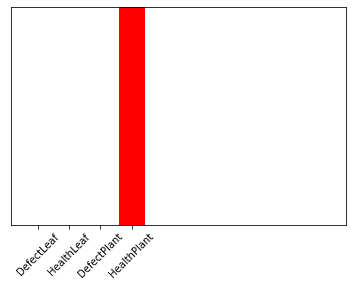

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(4), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

3

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(511, 500, 500, 1)
511


<Figure size 720x720 with 0 Axes>

16/16 [==============================] - 1s 78ms/step


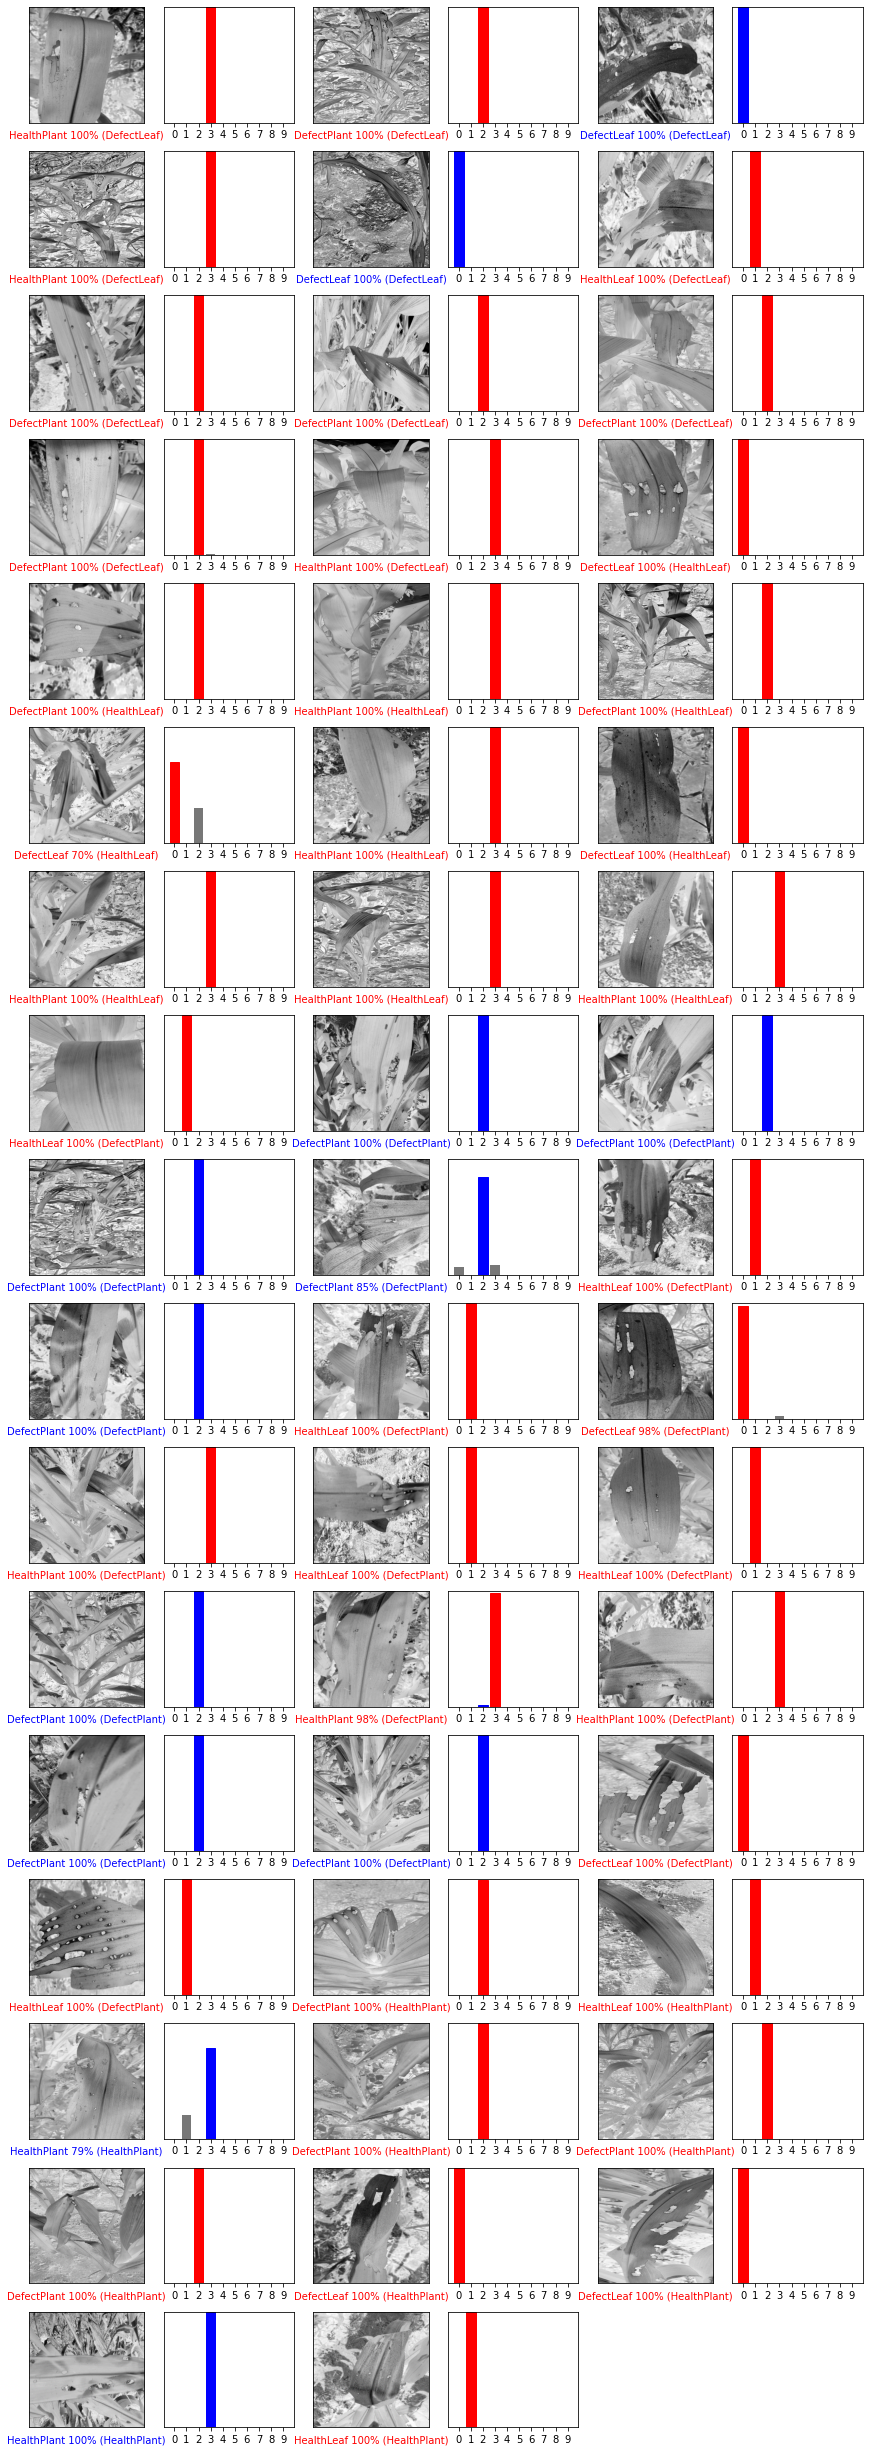

In [39]:
Testing_dir = '/Users/ittaitumelo/Downloads/Datasets'
testing_data=[]
for img in os.listdir(Testing_dir):
    try:
        img_array = cv2.imread(os.path.join(Testing_dir,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array])
    except Exception as e:
        print(e)
        pass
whaaaaa=[]
for features in testing_data:
    whaaaaa.append(features)
random.shuffle(whaaaaa)
whaaaaa = np.array(whaaaaa).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(whaaaaa.shape)
print(len(whaaaaa))
whaaaaa = whaaaaa / 255.0
plt.figure(figsize=(10,10))

plt.show()
whaaaaa = np.array(whaaaaa)
predictions = probability_model.predict(whaaaaa)
num_cols = 3
num_rows = int(len(whaaaaa)/num_cols)
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(50):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, whaaaaa)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()